In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore")

Importing

In [33]:
#Reading the dataset
df = pd.read_csv("/content/sample_data/diabetes.csv")

Exploring

In [34]:
# The first 5 observation units of the data set were accessed.
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [35]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


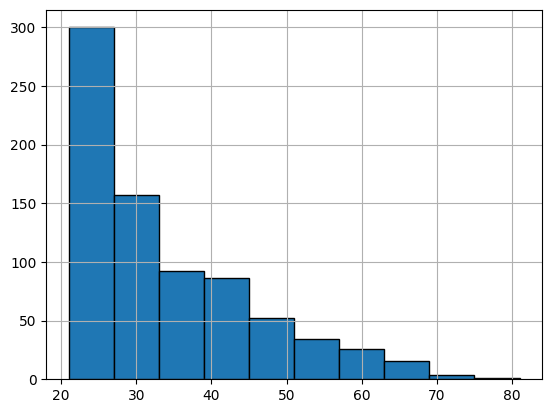

In [38]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

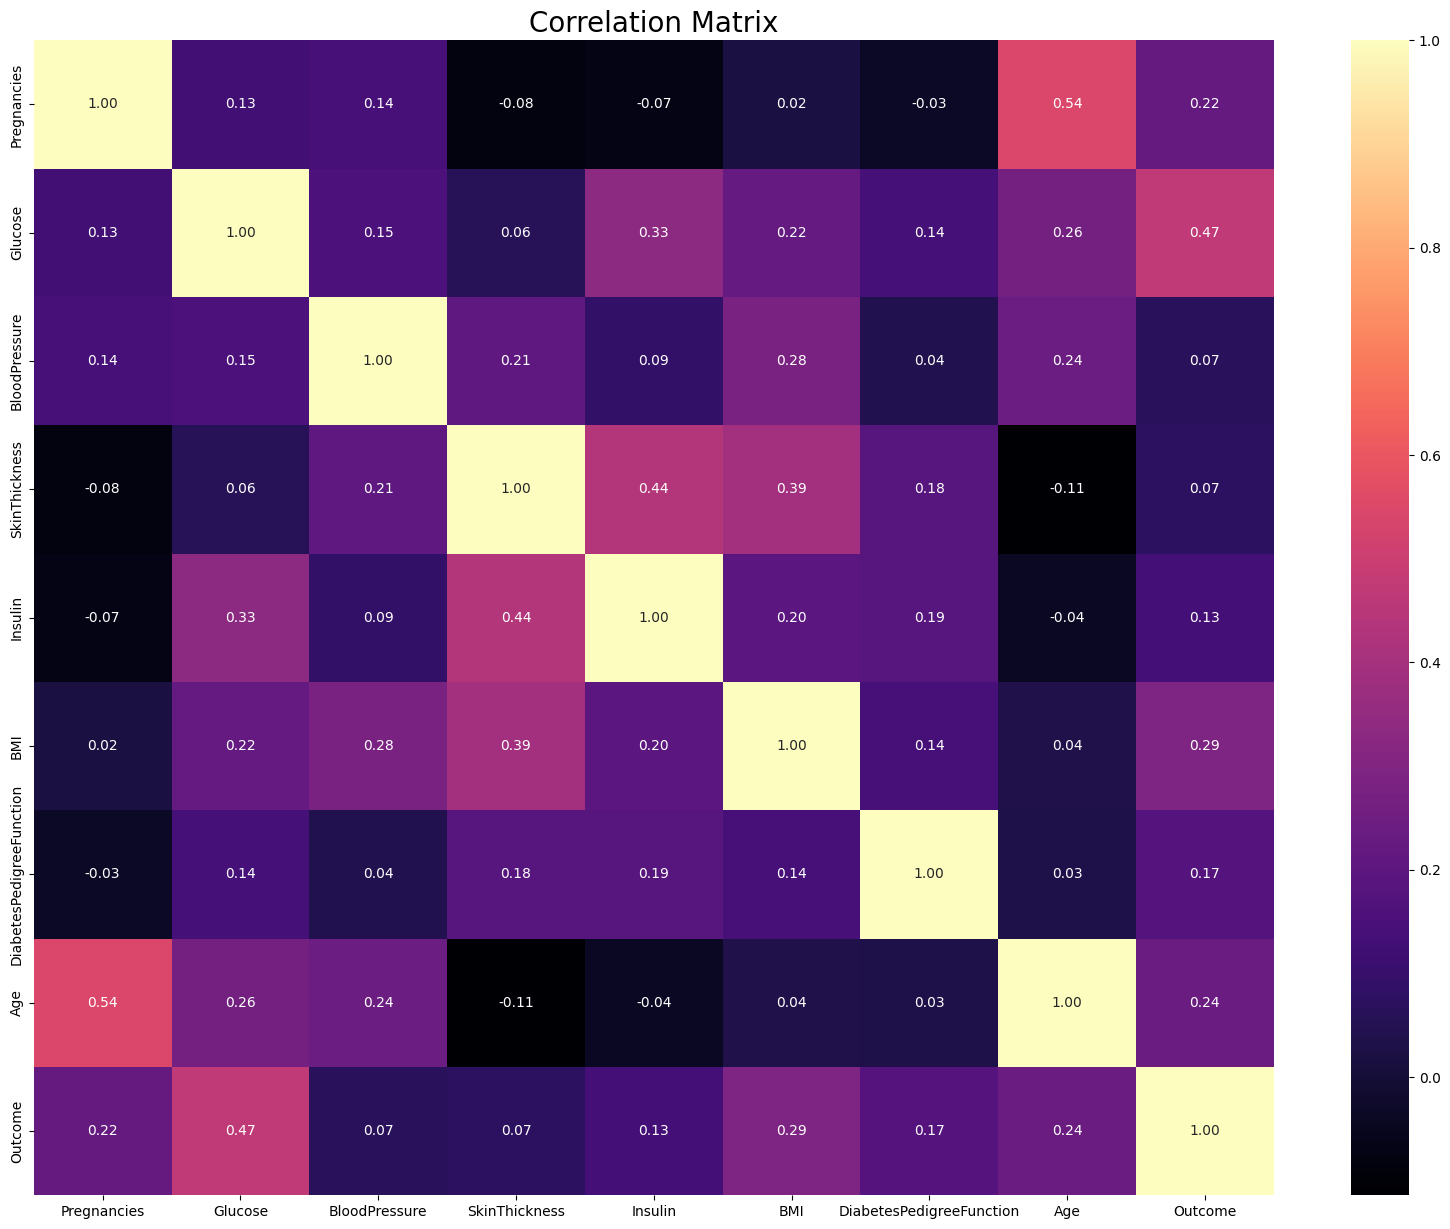

In [39]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [40]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [41]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Missing Values

In [42]:
# Now, we can look at where are missing values
df.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


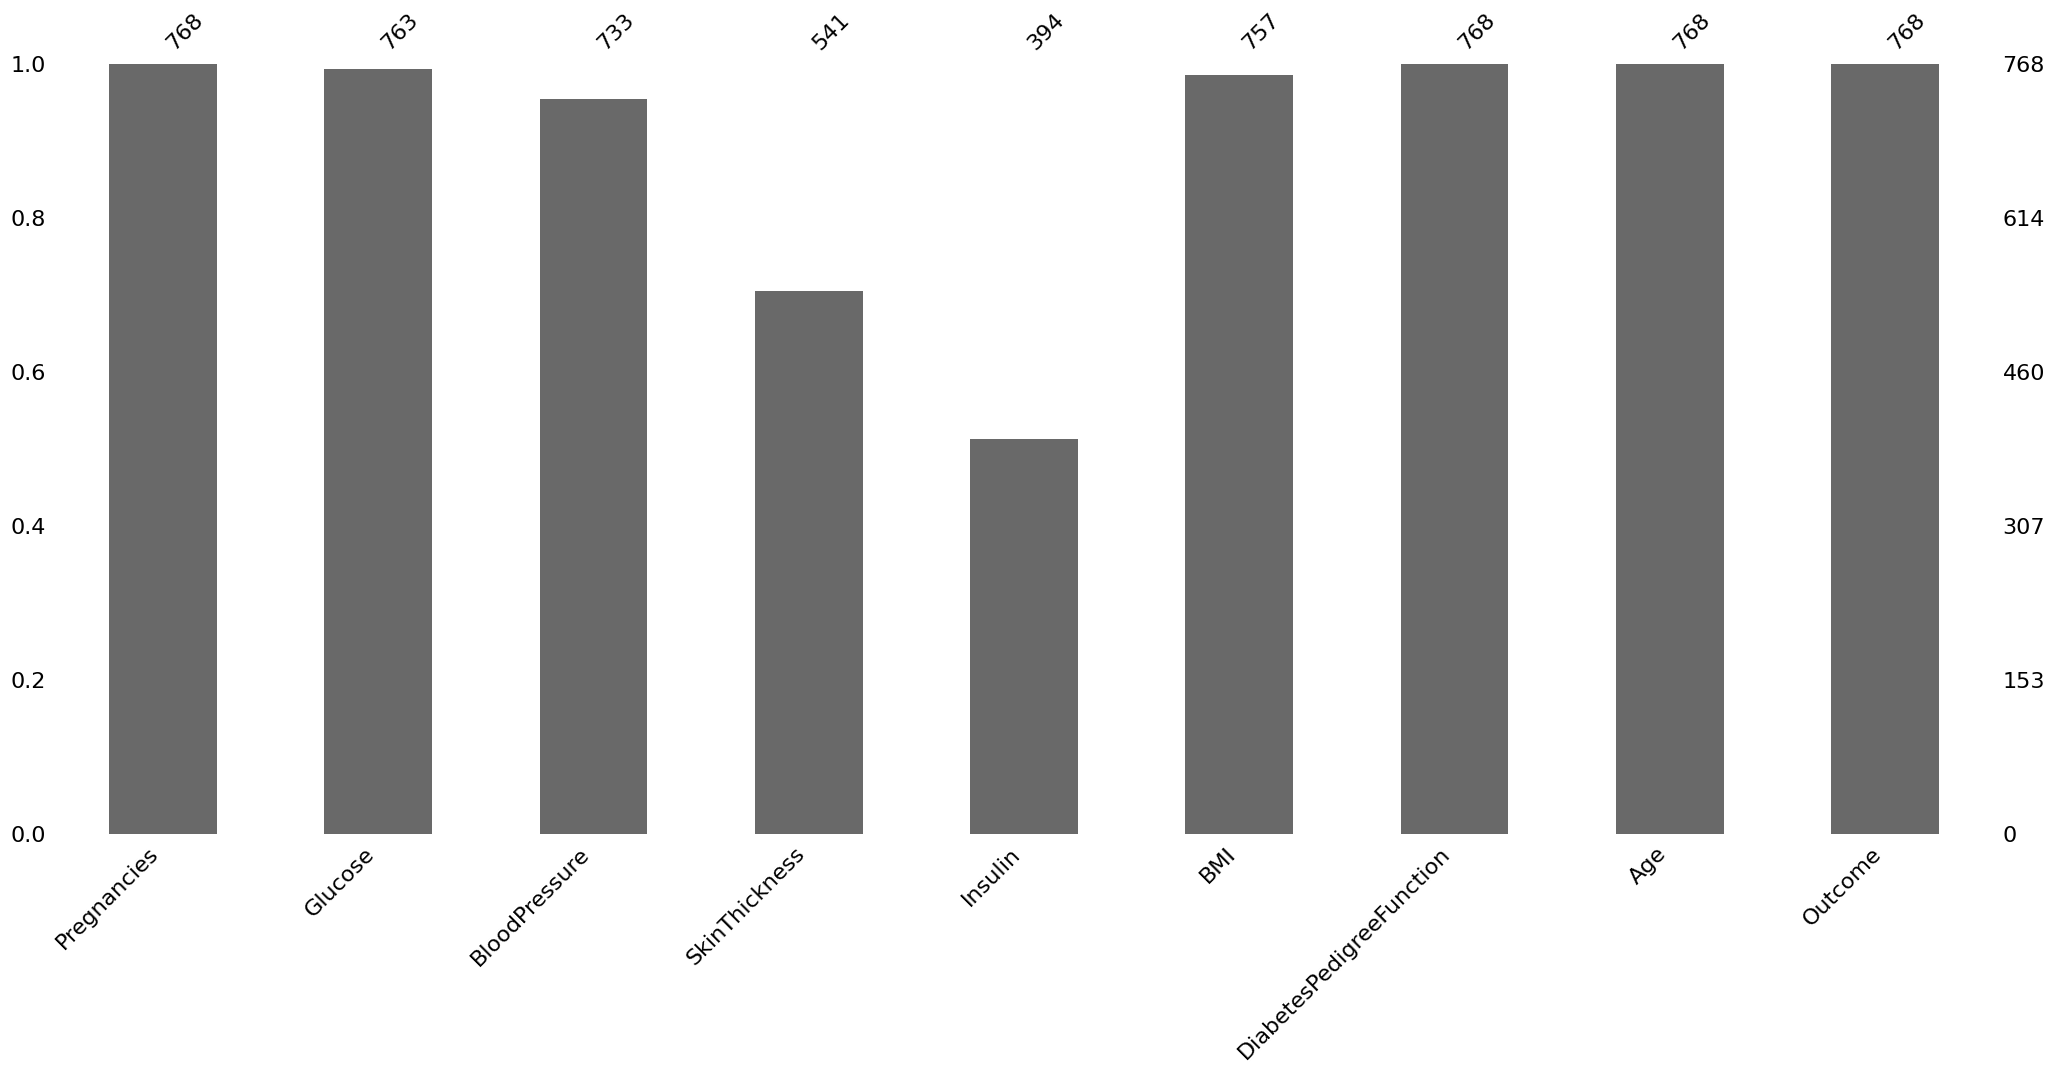

In [43]:
import missingno as msno
msno.bar(df);

In [44]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [45]:
# Missing values were filled.
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Exploring

In [46]:
def median_target(var):

    temp = df[df[var].notnull()]

    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()

    return temp
columns = df.columns

columns = columns.drop("Outcome")

for col in columns:

    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [47]:
X = df.drop(["Outcome"], axis = 1)
Y = df["Outcome"]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [48]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 2018)

In [49]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Training the model using SVC , KNN , Decision Tree with Adaboost and MultiLayer Perceptron

In [50]:
svm_clf = SVC(kernel='rbf' , gamma = 0.001 , C = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy' , random_state = 2018)
ada = AdaBoostClassifier(base_estimator = dt , n_estimators = 1000 , learning_rate = 0.1 , random_state = 2018)
mlp = MLPClassifier(activation = 'logistic' , solver = 'sgd' , learning_rate_init = 0.001 , learning_rate = 'constant' , alpha = 1e-4 , hidden_layer_sizes = (100,) , max_iter = 5000 , shuffle = True , random_state = 2018 )
svm_clf.fit(X_train_std , Y_train)
knn_clf.fit(X_train_std , Y_train)
ada.fit(X_train_std , Y_train)
mlp.fit(X_train_std , Y_train)

MLPClassifier(activation='logistic', max_iter=5000, random_state=2018,
              solver='sgd')

In [51]:
svm_pred = svm_clf.predict(X_test_std)
knn_pred = knn_clf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)
mlp_pred = mlp.predict(X_test_std)

In [52]:
print("Accuracy Score SVM" , accuracy_score(Y_test , svm_pred))
print("Accuracy Score KNN" , accuracy_score(Y_test , knn_pred))
print("Accuracy Score AdaBoost" , accuracy_score(Y_test , ada_pred))
print("Accuracy Score MLP" , accuracy_score(Y_test , mlp_pred))

Accuracy Score SVM 0.7359307359307359
Accuracy Score KNN 0.8051948051948052
Accuracy Score AdaBoost 0.8787878787878788
Accuracy Score MLP 0.8181818181818182


Feature Engineering

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=682)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
print("Accuracy Score RandomForest" , accuracy_score(Y_test , Y_pred_rf))
print(classification_report(Y_test , Y_pred_rf))
print(confusion_matrix(Y_test , Y_pred_rf))

Accuracy Score RandomForest 0.8874458874458875
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       162
           1       0.79      0.84      0.82        69

    accuracy                           0.89       231
   macro avg       0.86      0.87      0.87       231
weighted avg       0.89      0.89      0.89       231

[[147  15]
 [ 11  58]]


In [29]:
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
print(max_accuracy)
print(best_x)

90.91
834


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=834)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
print("Accuracy Score RandomForest with best parameters " , accuracy_score(Y_test , Y_pred_rf))
print(classification_report(Y_test , Y_pred_rf))
print(confusion_matrix(Y_test , Y_pred_rf))

Accuracy Score RandomForest with best parameters  0.9090909090909091
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       162
           1       0.84      0.86      0.85        69

    accuracy                           0.91       231
   macro avg       0.89      0.89      0.89       231
weighted avg       0.91      0.91      0.91       231

[[151  11]
 [ 10  59]]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

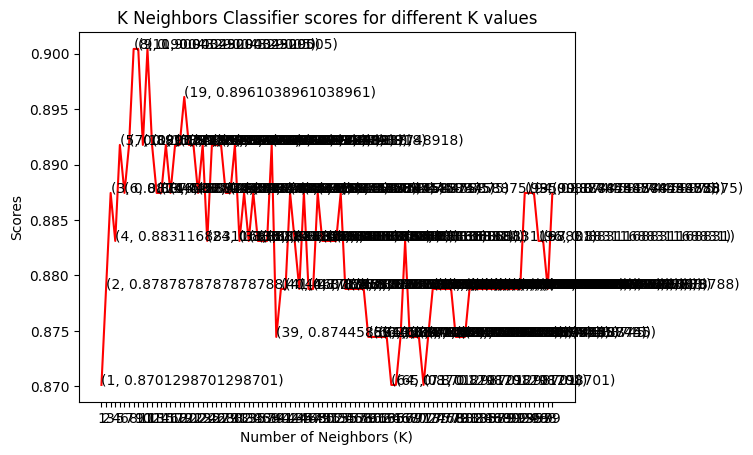

In [31]:
knn_scores = []
for k in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))
plt.plot(figsize=(20,20))
plt.plot([k for k in range(1, 100)], knn_scores, color = 'red')
for i in range(1,100):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 100)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [54]:
knn1_clf = KNeighborsClassifier(n_neighbors = 13)
knn1_clf.fit(X_train_std , Y_train)
knn1_pred = knn1_clf.predict(X_test_std)
print("Accuracy Score KNN with best parameters " , accuracy_score(Y_test , knn1_pred))
print(classification_report(Y_test , knn1_pred))
print(confusion_matrix(Y_test , knn1_pred))

Accuracy Score KNN with best parameters  0.8398268398268398
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       162
           1       0.72      0.77      0.74        69

    accuracy                           0.84       231
   macro avg       0.81      0.82      0.81       231
weighted avg       0.84      0.84      0.84       231

[[141  21]
 [ 16  53]]


Random Forest has highest accuracy of 0.91
so it is selected


